# Book
https://wikidocs.net/book/2788

```
torch --- tensor, like numpy
   |
   | ---- torch.autograd : Function, enable_grad/no_grad
   |
   | ---- torch.nn : Module, Loss functions
   |
   | ---- torch.optim : Optimization alogs centered on SGD
   |
   | ---- torch.utils.data : DataLoader, Dataset, minibatch utils
   |
   | ---- torch.onnx : ONNX(Open Neural Network Exchange) format
```

# Tensor
```
torch.tensor(arr, dtype)
torch.from_numpy(ndarray)
```
- Similar to Ndarray
- dType MUST be same

In [125]:
import torch
import numpy

x = torch.arange(10, dtype=torch.uint8).resize(2, 5) # shape [2, 5]
y = torch.eye(5, dtype=torch.uint8) # shape [5, 5]
z = torch.zeros(2, 5, dtype=torch.uint8) # shape

x @ y # x.matmul(y)
x * z # x.mul(y)

x = x.to(torch.float16)
x.mean(dim=-1)


# tensor.view == ndarray.reshape
x = x.view(5, 2)
x = x.view(-1, 5) # -1 is determined automatically
# tensor.shape == tensor.size()
assert x.shape == x.size()
assert x.shape[0] == x.size(0)

# Squeeze & Unsqueeze
t = torch.randn(1, 10, 1, 3, 1)
assert t.squeeze().shape == torch.Size([10, 3]) # Remove 1-dim

t = torch.randn(10)
assert t.unsqueeze(1).shape == torch.Size([10, 1]) # Add 1-dim
assert t.unsqueeze(0).shape == torch.Size([1, 10])

# Concat & Stacking
x = torch.ones(1, 2, 3)
y = torch.ones(1, 2, 3)
# Extend dim
# Other dimensions MUST be same
assert torch.cat([x,y]).shape == torch.Size([2, 2, 3]) 
assert torch.cat([x,y], dim=1).shape == torch.Size([1, 4, 3])

# Stack at dim
# All dim must be same
assert torch.stack([x, y], dim = 0).shape == torch.Size([2, 1, 2, 3])
assert torch.stack([x, y], dim = 1).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 2).shape == torch.Size([1, 2, 2, 3])
assert torch.stack([x, y], dim = 3).shape == torch.Size([1, 2, 3, 2])

# in-place operator has _ postfix
x = torch.ones(1)
x.mul_(2)
assert x == torch.ones(1) * 2

## Linear Regression
- To train & eval, dataset and model MUST be in same device
- To pass data, data & parameters MUST be same dtype

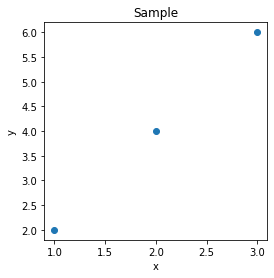

In [126]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([1,2,3]).unsqueeze(1) # batchsize, x
y_train = torch.FloatTensor([2,4,6]).unsqueeze(1) # batchsize, y

x_valid = torch.FloatTensor([7,8,9]).unsqueeze(1)
y_valid = torch.FloatTensor([14,16,18]).unsqueeze(1)

x_test = torch.FloatTensor([4,5,6]).unsqueeze(1)
y_test = torch.FloatTensor([8,10,12]).unsqueeze(1)
plt.figure(figsize=(4,4))
plt.title("Sample")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train)

Epoch  100/1000 W: 1.752, b: 0.564 Cost: 0.045798
Epoch  200/1000 W: 1.805, b: 0.443 Cost: 0.028300
Epoch  300/1000 W: 1.847, b: 0.348 Cost: 0.017488
Epoch  400/1000 W: 1.880, b: 0.274 Cost: 0.010806
Epoch  500/1000 W: 1.905, b: 0.215 Cost: 0.006678
Epoch  600/1000 W: 1.926, b: 0.169 Cost: 0.004126
Epoch  700/1000 W: 1.941, b: 0.133 Cost: 0.002550
Epoch  800/1000 W: 1.954, b: 0.105 Cost: 0.001576
Epoch  900/1000 W: 1.964, b: 0.082 Cost: 0.000974
Epoch 1000/1000 W: 1.972, b: 0.065 Cost: 0.000602


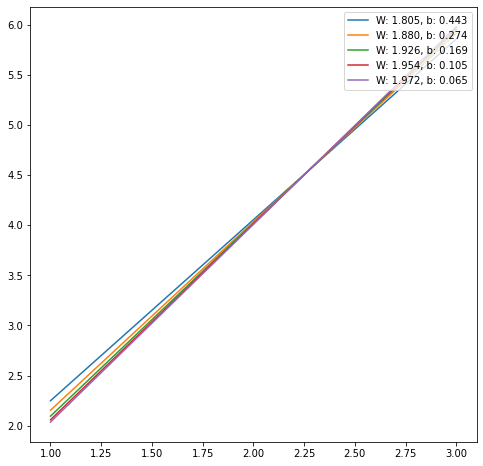

In [155]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

torch.manual_seed(1) # Fix seed
    
# Initialize parameters
W = torch.randn(1, 1, requires_grad=True) # Track gradients
b = torch.randn(1, 1, requires_grad=True) # Track gradients

plt.figure(figsize=(8,8))

nb_epochs = 1000
for epoch in range(1, nb_epochs+1):
    # Hypothesis
    H = x_train @ W + b

    # Cost function
    cost = torch.mean((H - y_train) ** 2, dim = 0)    

    # Optimizer
    optimizer = optim.SGD([W, b], lr=1e-2)

    # Learning
    ## Reset gradient
    optimizer.zero_grad()
    ## Calcuate gradient
    cost.backward()
    ## Update parameters
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.item(), b.item(), cost.item()))
    if epoch % 200 == 0:
        plt.plot(x_train, H.detach().numpy(), label = "W: {:.3f}, b: {:.3f}".format(W.item(), b.item()))

plt.legend(loc='upper right')

### Optimizer.zero_grad()
- Pytorch accumulates gradients

In [164]:
import torch
w = torch.tensor(2.0, requires_grad=True)
nb_epochs = 2
for epoch in range(nb_epochs + 1):
    z = 2*w
    z.backward()
    print("dz/dw: {}".format(w.grad))

print('='*20)
optimizer = torch.optim.SGD([w], lr=1e-2)
for epoch in range(nb_epochs + 1):
    z = 2*w
    optimizer.zero_grad()
    z.backward()
    print("dz/dw: {}".format(w.grad))


dz/dw: 2.0
dz/dw: 4.0
dz/dw: 6.0
dz/dw: 2.0
dz/dw: 2.0
dz/dw: 2.0


## Autograd
```requires_grad=True``` applies **autograd** option

In [167]:
import torch
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5
z.backward()
print("dz/dw: {}".format(w.grad))

dz/dw: 8.0


## Multivariable Linear Regression

In [244]:
import pandas as pd
import numpy as np
import torch

df = pd.DataFrame(np.array([
    [73, 93, 89, 96, 73],
    [80, 88, 91, 98, 66],
    [75, 93, 80, 100, 70],
]).T, columns=['Quize 1(x1)', 'Quize 2(x2)', 'Quize 3(x3)'])
final = np.sum(df.to_numpy(), axis=1)
df['Final(y)'] = final

# Data
x_train = torch.from_numpy(df.iloc[:, :3].to_numpy()).to(torch.float32) # shape = [5, 3]
y_train = torch.from_numpy(df.iloc[:, 3].to_numpy()).to(torch.float32).view(-1,1) # shape = [5, 1]

# Hypothesis
torch.manual_seed(1)
W = torch.zeros(3, 1, requires_grad=True, dtype=torch.float32)
b = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Optimizer
optimizer = torch.optim.SGD([W, b], lr=1e-5, momentum=.7)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    H = x_train @ W + b
    cost = torch.mean((H - y_train) ** 2)
    #Learn
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W: {}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.detach().squeeze(), b.item(), cost.item()))

Epoch  100/1000 W: tensor([1.0042, 1.0027, 0.9928]), b: 0.012 Cost: 0.001094
Epoch  200/1000 W: tensor([1.0040, 1.0023, 0.9935]), b: 0.012 Cost: 0.000891
Epoch  300/1000 W: tensor([1.0038, 1.0019, 0.9941]), b: 0.012 Cost: 0.000729
Epoch  400/1000 W: tensor([1.0036, 1.0016, 0.9946]), b: 0.012 Cost: 0.000599
Epoch  500/1000 W: tensor([1.0034, 1.0013, 0.9951]), b: 0.012 Cost: 0.000494
Epoch  600/1000 W: tensor([1.0032, 1.0011, 0.9955]), b: 0.012 Cost: 0.000409
Epoch  700/1000 W: tensor([1.0030, 1.0009, 0.9959]), b: 0.012 Cost: 0.000340
Epoch  800/1000 W: tensor([1.0029, 1.0007, 0.9963]), b: 0.012 Cost: 0.000284
Epoch  900/1000 W: tensor([1.0027, 1.0005, 0.9966]), b: 0.012 Cost: 0.000239
Epoch 1000/1000 W: tensor([1.0026, 1.0004, 0.9969]), b: 0.012 Cost: 0.000201


### Linear Regression with nn.Module

In [259]:
import torch
import torch.nn as nn
import torch.nn.functional as F # loss function

# data
x_train = torch.FloatTensor([[1],[2],[3]]) # shape = [3, 1]
y_train = torch.FloatTensor([[2], [4], [6]]) # shape = [3, 1]

model = nn.Linear(1, 1, dtype=torch.float32)

#parameters
print(list(model.parameters())) # First: W, Last: b

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    y_pred = model(x_train)
    cost = F.mse_loss(y_pred, y_train)
    
    # Learn
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}"\
              .format(epoch, nb_epochs, cost.item()))
        
# Predict
new_var = torch.FloatTensor([4.])

with torch.autograd.no_grad():
    pred_y = model(new_var) #Forward
    print("2x4={:.2f}".format(pred_y.item()))
    


[Parameter containing:
tensor([[0.5961]], requires_grad=True), Parameter containing:
tensor([0.5435], requires_grad=True)]
Epoch    0/2000 Cost: 6.440542
Epoch  500/2000 Cost: 0.012233
Epoch 1000/2000 Cost: 0.001102
Epoch 1500/2000 Cost: 0.000099
Epoch 2000/2000 Cost: 0.000009
2x4=7.99


## Implement model with class

In [268]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

class MultivariableLinearRegressionModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        return self.linear(x)

## Mini Batch and Data Load
- batch_size := the size of mini batch
  - Batch Size is a power of 2 'cause the memories of CPU and GPU are multiples of 2
- Mini Batch is like **stochastic search**
- Dataset := Define dataset
- DataLoader := Iter(Dataset)
- DataPipe := Pipelining dataset

In [279]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

x_train = torch.tensor([
    [73, 80, 75],
    [93, 88, 93],
    [89, 91, 90],
    [96, 98, 100],
    [73, 66, 70],
], dtype=torch.float32) # shape [dataset, features]
y_train = torch.tensor([
    [152],
    [185],
    [180],
    [196],
    [142],
], dtype=torch.float32) # shape [ dataset, output]

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 5
for epoch in range(1, nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        y_pred = model(x_train)
        # Learn
        optimizer.zero_grad()
        cost = F.mse_loss(y_pred, y_train)
        cost.backward()
        optimizer.step()
        
        print('Epoch: {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()
        ))
        

Epoch:    1/5 Batch 1/3 Cost: 52053.398438
Epoch:    1/5 Batch 2/3 Cost: 8749.958008
Epoch:    1/5 Batch 3/3 Cost: 2212.415039
Epoch:    2/5 Batch 1/3 Cost: 1748.180542
Epoch:    2/5 Batch 2/3 Cost: 362.186890
Epoch:    2/5 Batch 3/3 Cost: 103.965866
Epoch:    3/5 Batch 1/3 Cost: 44.238678
Epoch:    3/5 Batch 2/3 Cost: 19.316801
Epoch:    3/5 Batch 3/3 Cost: 7.101295
Epoch:    4/5 Batch 1/3 Cost: 4.449821
Epoch:    4/5 Batch 2/3 Cost: 1.305181
Epoch:    4/5 Batch 3/3 Cost: 0.040987
Epoch:    5/5 Batch 1/3 Cost: 1.701204
Epoch:    5/5 Batch 2/3 Cost: 2.216830
Epoch:    5/5 Batch 3/3 Cost: 0.132739


## Custom Dataset

In [282]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset): # Like Sequence
    def __init__(self):
        # Preprocessing
        self.x_data = torch.tensor([
            [73, 80, 75],
            [93, 88, 93],
            [89, 91, 90],
            [96, 98, 100],
            [73, 66, 70],
        ], dtype=torch.float32)
        
        self.y_data = torch.tensor([
            [152],
            [185],
            [180],
            [196],
            [142],
        ], dtype=torch.float32)
    
    def __len__(self):
        # Total size of dataset
        return len(self.x_data)
    
    def __getitem__(self):
        # Get a sample
        x = tensor.tensor(self.x_data[i])
        y = tensor.tensor(self.y_data[i])
        return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

## Logistic Regression
```
sigmoid(x) = 1/{1 + exp(x*w + b)}
```
- W := scaling sigmoid
- b := moving sigmoid
- With sigmoid, **CROSS-ENTROPY** is loss function

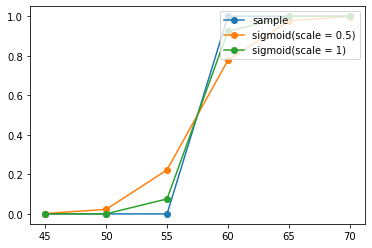

In [326]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(range(45, 75, 5), columns=['score(x)'])
df['result(y)'] = list(map(lambda score: '합격' if score >= 60 else '불합격', df.iloc[:,0].to_numpy()))

x = df.iloc[:,0].to_numpy()
y = list(map(lambda result: 1 if result == '합격' else 0, df.iloc[:,1].to_numpy()))
plt.plot(x, y, marker='o', label='sample')

# Sigmoid
sigmoid = lambda x: 1/(1+np.exp(-x))
y_pred = sigmoid(.5*(x - np.mean(x)))
plt.plot(x, y_pred, marker='o', label='sigmoid(scale = 0.5)')
y_pred = sigmoid(1*(x - np.mean(x)))
plt.plot(x, y_pred, marker='o', label='sigmoid(scale = 1)')
plt.legend(loc='upper right')
plt.show()

In [336]:
# Implement logistic regression
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(1)
x_data = torch.FloatTensor([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2],
])
y_data = torch.FloatTensor([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
])

W = torch.randn(2, 1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)
optimizer = optim.SGD([W, b], lr=1e-2)
nb_epochs = 5000
for epoch in range(1, nb_epochs+1):
    H = 1/(1 + torch.exp(-(x_data @ W + b)))
    
    # Learn
    optimizer.zero_grad()
    cost = F.binary_cross_entropy(H, y_data)
    cost.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print("Epoch {:4d}/{} W: {}, b: {:.3f} Cost: {:.6f}"\
              .format(epoch, nb_epochs, W.detach().squeeze(), b.item(), cost.item()))  

# Predict
with torch.autograd.no_grad():
    y_pred = torch.sigmoid(x_data @ W + b)
    prediction = y_pred >= torch.FloatTensor([.5])
    print(prediction.squeeze())

Epoch  500/5000 W: tensor([ 0.6194, -0.4417]), b: -0.632 Cost: 0.458254
Epoch 1000/5000 W: tensor([ 0.7924, -0.5166]), b: -1.085 Cost: 0.409310
Epoch 1500/5000 W: tensor([ 0.8860, -0.4934]), b: -1.488 Cost: 0.374899
Epoch 2000/5000 W: tensor([ 0.9478, -0.4357]), b: -1.858 Cost: 0.346031
Epoch 2500/5000 W: tensor([ 0.9955, -0.3668]), b: -2.203 Cost: 0.320834
Epoch 3000/5000 W: tensor([ 1.0367, -0.2965]), b: -2.526 Cost: 0.298610
Epoch 3500/5000 W: tensor([ 1.0747, -0.2287]), b: -2.830 Cost: 0.278923
Epoch 4000/5000 W: tensor([ 1.1110, -0.1650]), b: -3.116 Cost: 0.261424
Epoch 4500/5000 W: tensor([ 1.1462, -0.1058]), b: -3.387 Cost: 0.245816
Epoch 5000/5000 W: tensor([ 1.1806, -0.0510]), b: -3.643 Cost: 0.231843
tensor([False, False, False,  True,  True,  True])


## Logistic with nn.Module

In [348]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
x_data = torch.FloatTensor([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2],
])
y_data = torch.FloatTensor([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
])

model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid() # output
)

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=.7)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    y_pred = model(x_data)
    
    # Learn
    optimizer.zero_grad()
    cost = F.binary_cross_entropy(y_pred, y_data)
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        prediction = y_pred > torch.FloatTensor([.5])
        correct_prediction = prediction.float() == y_data
        accuracy = torch.sum(correct_prediction).item() / len(correct_prediction)
        print('Epoch: {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy * 100))
        

Epoch:    0/10000 Cost: 0.539713 Accuracy: 83.33%
Epoch: 1000/10000 Cost: 0.285175 Accuracy: 83.33%
Epoch: 2000/10000 Cost: 0.194415 Accuracy: 100.00%
Epoch: 3000/10000 Cost: 0.146636 Accuracy: 100.00%
Epoch: 4000/10000 Cost: 0.117751 Accuracy: 100.00%
Epoch: 5000/10000 Cost: 0.098494 Accuracy: 100.00%
Epoch: 6000/10000 Cost: 0.084747 Accuracy: 100.00%
Epoch: 7000/10000 Cost: 0.074434 Accuracy: 100.00%
Epoch: 8000/10000 Cost: 0.066406 Accuracy: 100.00%
Epoch: 9000/10000 Cost: 0.059972 Accuracy: 100.00%
Epoch: 10000/10000 Cost: 0.054698 Accuracy: 100.00%


## Logistic with Class

In [349]:
import torch.nn as nn
import torch

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        return self.sigmoid(self.linear(x))

## Softmax Regression
- Multi-Class Classification
- Use **ONE-HOT-VECTOR** for **LABEL**
- Use **CROSS-ENTROPY** for **COST**

In [384]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

X = torch.randn(3, 5, requires_grad=True)
H = torch.softmax(X, dim=1)

y = torch.randint(5, (3,)).long() # Class: 0 ... 4
print(y)

y_one_hot = torch.zeros_like(H) # shape = [3, 5]
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

cost = -torch.mean(torch.sum(y_one_hot * torch.log(H),dim=1))

# OR
model = nn.Sequential(
    nn.Linear(3, 5), # in_dim, out_dim
    nn.Softmax(5), #
)

tensor([2, 3, 2])


tensor(1.9087, grad_fn=<NegBackward0>)

In [267]:
torch.tensor([0,0,0]).scatter(0, torch.tensor([1]), torch.tensor([1]))

tensor([0, 1, 0])